## 0. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_x = pd.read_csv('data/train/train.csv')
train_y = pd.read_csv('data/train/train_label.csv')
test_x = pd.read_csv('data/test/test.csv')
test_y = pd.read_csv('data/test/test_label.csv')

In [3]:
# EDA 및 전처리 과정 용이하게 하기 위해 합침
train = pd.merge(train_x, train_y)

In [4]:
# EDA 및 전처리 과정 용이하게 하기 위해 합침
test = pd.merge(test_x, test_y)

## 1. train, test 공통 전처리

In [5]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19031,365243,1,0,0,0,NaN,2,-53,1
1,1,F,N,N,1,157500.0,Working,Higher education,Married,House / apartment,-15773,-309,1,0,1,0,Sales staff,3,-26,0
2,2,M,Y,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13483,-1816,1,1,1,0,Laborers,2,-9,1
3,3,F,Y,N,2,112500.0,Working,Secondary / secondary special,Married,House / apartment,-12270,-150,1,0,1,0,Security staff,4,-12,1
4,4,M,Y,Y,1,225000.0,Working,Secondary / secondary special,Married,House / apartment,-16175,-2371,1,0,0,0,Drivers,3,-3,1


In [6]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,M,N,Y,0,211500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10072,-1101,1,1,1,0,Core staff,1,-10,NaN
1,1,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-24340,365243,1,0,1,0,NaN,1,-52,NaN
2,2,F,N,Y,0,45000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15724,-1389,1,1,1,0,Sales staff,2,-15,NaN
3,3,M,N,Y,2,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11505,-4019,1,0,0,0,Laborers,3,-24,NaN
4,4,F,N,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-15929,-2879,1,0,1,0,Laborers,2,-54,NaN


### (1) index 전처리
+ index column은 분류 모델에 무의미하다는 판단 $\to$ drop

In [7]:
train = train.drop(['index'],axis=1)

In [8]:
test = test.drop(['index'],axis=1)

### (2) DAYS_EMPLOYED 전처리
+ 양수 값 : 크기에 상관없이 고용되지 않은 상태를 의미 $\to$ 양수 값에 대한 전처리 : 모두 0으로

In [9]:
# 기존에 'DAYS_EMPLOYED'가 0의 값을 가지는 경우 -> 존재하지 않음
train[train['DAYS_EMPLOYED']==0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [10]:
# 'DAYS_EMPLOYED'값이 0보다 큰 경우 모두 0으로 지정
train.loc[train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = 0

In [11]:
# 'DAYS_EMPLOYED'값이 0보다 큰 경우 모두 0으로 지정
test.loc[test['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = 0

### (3) occyp_type 전처리
+ train : 4132개의 NaN 값 존재
+ test : 4039개의 NaN 값 존재

#### train

In [12]:
# train에서 'occyp_type'가 NaN 값인 크기
train[train['occyp_type'].isnull()].shape

(4132, 19)

In [13]:
# train에서 'DAYS_EMPLOYED'가 0인 값의 크기
a = train[train['DAYS_EMPLOYED']==0]
a.shape

(2247, 19)

In [14]:
# train에서 'DAYS_EMPLOYED'가 0인 것들 중에 'occyp_type'가 NaN 값인 크기
a_1 = a[a['occyp_type'].isnull()]
a_1.shape

(2247, 19)

In [15]:
# train에서 'DAYS_EMPLOYED'가 0이면 'occyp_type'은 NaN 값을 가짐
a_1.equals(a)

True

#### test

In [16]:
# test에서 'occyp_type'가 NaN 값인 크기
test[test['occyp_type'].isnull()].shape

(4039, 19)

In [17]:
# test에서 'DAYS_EMPLOYED'가 0인 값의 크기
b = test[test['DAYS_EMPLOYED']==0]
b.shape

(2191, 19)

In [18]:
# test에서 'DAYS_EMPLOYED'가 0인 것들 중에 'occyp_type'가 NaN 값인 크기
b_1 = b[b['occyp_type'].isnull()]
b_1.shape

(2191, 19)

In [19]:
# test에서 'DAYS_EMPLOYED'가 0이면 'occyp_type'은 NaN 값을 가짐
b_1.equals(b)

True

#### train, test 모두 'DAYS_EMPLOYED'가 0이면 'occyp_type'은 NaN 값을 가짐 : 무직이기에 직업 유형이 결측값을 가지는 것 $\to$ 'None'이라는 값으로 대체

####  'DAYS_EMPLOYED'가 0이 아닌데 'occyp_type'이 NaN 값을 가지는 경우 $\to$ 'Extra'(기타)로 대체

In [20]:
train.loc[(train['DAYS_EMPLOYED'] == 0) & (train['occyp_type'].isnull()), 'occyp_type'] = 'None'

In [21]:
train.loc[(train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isnull()), 'occyp_type'] = 'Extra'

In [22]:
test.loc[(test['DAYS_EMPLOYED'] == 0) & (test['occyp_type'].isnull()), 'occyp_type'] = 'None'

In [23]:
test.loc[(test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isnull()), 'occyp_type'] = 'Extra'

In [24]:
# 결측치 해결
train.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [25]:
# 결측치 해결(실제 예측해야 할 credit 값 제외)
test.isnull().sum()

gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type           0
family_size          0
begin_month          0
credit           13229
dtype: int64

### (4) FLAG_MOBIL 전처리
+ 모두 1이라는 단일 값만을 가짐 $\to$ 분류 모델에 영향이 없을 것이라는 판단 $\to$ 변수 축소(column drop)

In [26]:
train = train.drop(['FLAG_MOBIL'],axis=1)

In [27]:
test = test.drop(['FLAG_MOBIL'],axis=1)

### (5) 범주형 변수 더미화

In [28]:
# train 더미화
train_dum = pd.get_dummies(train, columns = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type'])

In [29]:
# test 더미화
test_dum = pd.get_dummies(test, columns = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type'])

## 2. Clustering Analysis
+ y값인 'credit'을 drop 후 train, test 모든 데이터셋을 합쳐 clustering 진행
+ cluster 값을 데이터 column에 추가 반영하여 이후 train 데이터를 사용해 DNN, DT, LR 모델링 진행
+ random_state = 42로 통일

### (1) 추가 전처리

In [30]:
# data : train_dum과 test_dum을 위아래로 합친 df
data = pd.concat([train_dum, test_dum])
data

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,202500.0,-19031,0,0,0,0,2,-53,1.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,157500.0,-15773,-309,0,1,0,3,-26,0.0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,135000.0,-13483,-1816,1,1,0,2,-9,1.0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2,112500.0,-12270,-150,0,1,0,4,-12,1.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,225000.0,-16175,-2371,0,0,0,3,-3,1.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13224,0,202500.0,-12347,-2057,0,0,0,2,-30,NaN,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
13225,0,148500.0,-9382,-2049,0,1,1,1,-24,NaN,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13226,0,270000.0,-14896,-5420,0,0,1,2,-26,NaN,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13227,0,405000.0,-15881,-4781,1,0,0,2,-30,NaN,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [31]:
# index 재지정
data = data.reset_index(drop=True)
data

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,202500.0,-19031,0,0,0,0,2,-53,1.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,157500.0,-15773,-309,0,1,0,3,-26,0.0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,135000.0,-13483,-1816,1,1,0,2,-9,1.0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2,112500.0,-12270,-150,0,1,0,4,-12,1.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,225000.0,-16175,-2371,0,0,0,3,-3,1.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,202500.0,-12347,-2057,0,0,0,2,-30,NaN,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
26453,0,148500.0,-9382,-2049,0,1,1,1,-24,NaN,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
26454,0,270000.0,-14896,-5420,0,0,1,2,-26,NaN,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26455,0,405000.0,-15881,-4781,1,0,0,2,-30,NaN,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
# data_1 : data에서 'credit'을 뺀, 즉 라벨값 제거 df
# data_2 : data의 'credit' column, 즉 라벨값
data_1 = data.drop(['credit'],axis=1)
data_2 = data['credit']

### (2) Scaling

In [33]:
# 라벨값이 포함되지 않은 데이터인 data_1에 대해 minmaxscaling 진행 -> scaled_df 생성
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(data=scaler.fit_transform(data_1), columns=data_1.columns)
scaled_df.shape
scaled_df

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0.000000,0.113372,0.350834,1.000000,0.0,0.0,0.0,0.052632,0.116667,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.052632,0.084302,0.537571,0.980335,0.0,1.0,0.0,0.105263,0.566667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000000,0.069767,0.668826,0.884427,1.0,1.0,0.0,0.052632,0.850000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.105263,0.055233,0.738350,0.990454,0.0,1.0,0.0,0.157895,0.800000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.052632,0.127907,0.514530,0.849106,0.0,0.0,0.0,0.105263,0.950000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0.000000,0.113372,0.733937,0.869089,0.0,0.0,0.0,0.052632,0.500000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26453,0.000000,0.078488,0.903880,0.869598,0.0,1.0,1.0,0.000000,0.600000,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26454,0.000000,0.156977,0.587837,0.655063,0.0,0.0,1.0,0.052632,0.566667,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26455,0.000000,0.244186,0.531381,0.695730,1.0,0.0,0.0,0.052632,0.500000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### (3) KMeans

In [34]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=42)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

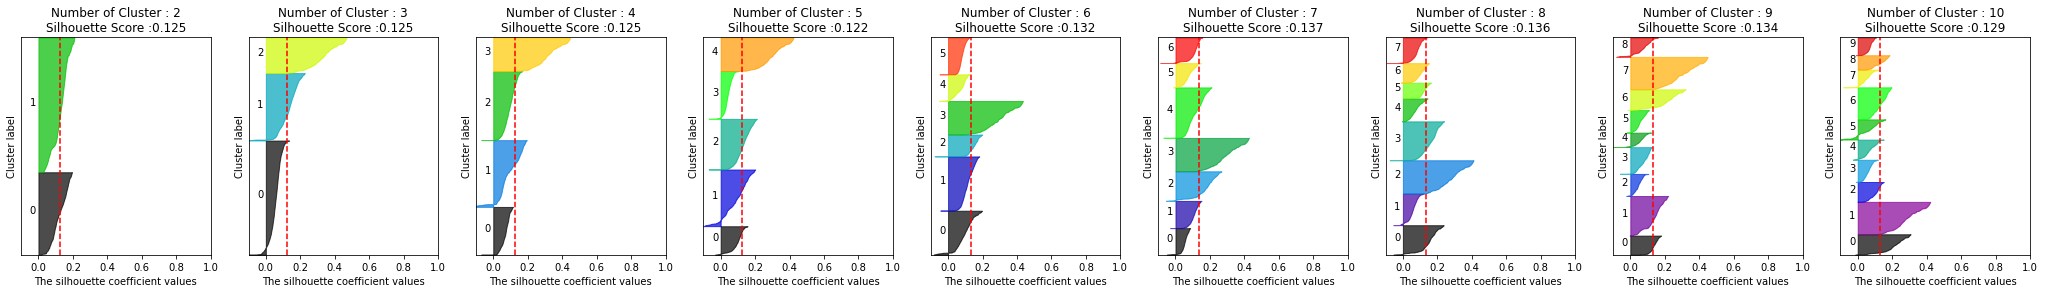

In [35]:
# 실루엣 계수 시각화 -> cluster 개수 2가 최적으로 판단
visualize_silhouette([2,3,4,5,6,7,8,9,10], scaled_df)

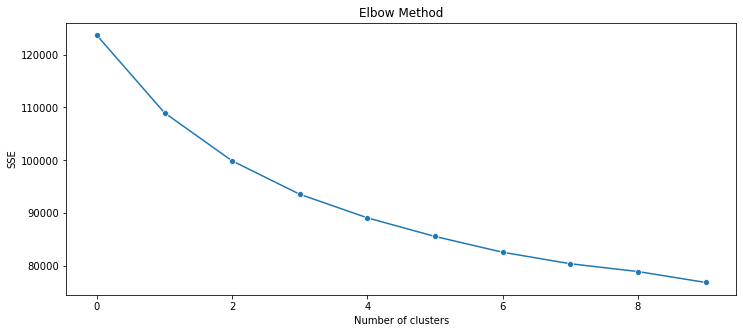

In [36]:
# elbow method 사용
from sklearn.cluster import KMeans 
import seaborn as sns

SSE = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(scaled_df)
    SSE.append(kmeans.inertia_)

plt.figure(figsize=(12,5))
sns.lineplot(SSE, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [37]:
# KMeans -> n_cluster=2로 진행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit(scaled_df)

#클러스터링 변수인 clusters 값을 원본 데이터인 'scaled_df'내에 넣기 
scaled_df['cluster'] = clusters.labels_
scaled_df.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,cluster
0,0.000000,0.113372,0.350834,1.000000,0.0,0.0,0.0,0.052632,0.116667,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.052632,0.084302,0.537571,0.980335,0.0,1.0,0.0,0.105263,0.566667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.000000,0.069767,0.668826,0.884427,1.0,1.0,0.0,0.052632,0.850000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.105263,0.055233,0.738350,0.990454,0.0,1.0,0.0,0.157895,0.800000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.052632,0.127907,0.514530,0.849106,0.0,0.0,0.0,0.105263,0.950000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [38]:
# cluster를 기준으로 데이터 개수 세기
scaled_df.groupby('cluster').count()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047,10047
1,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410,16410


In [39]:
#그룹별 특징을 알아보기(그룹별 평균값)
scaled_df.groupby('cluster').mean()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.027680,0.121509,0.575247,0.859244,0.238678,0.286255,0.098238,0.072208,0.554046,0.450980,0.549020,0.0,1.0,0.336021,0.663979,0.268239,0.091769,0.074848,0.000000,0.565144,0.001294,0.329352,0.041505,0.007166,0.620683,0.072061,0.773863,0.039216,0.095750,0.019110,0.006071,0.887927,0.027073,0.008958,0.016522,0.053449,0.036827,0.005176,0.009655,0.098238,0.115358,0.144819,0.002488,0.044491,0.001891,0.185827,0.003185,0.124216,0.023490,0.091171,0.007465,0.002090,0.085200,0.001692,0.014930,0.001792
1,0.019427,0.092566,0.497403,0.860595,0.216210,0.299147,0.087020,0.057349,0.571081,0.802316,0.197684,1.0,0.0,0.319988,0.680012,0.213711,0.214930,0.085436,0.000427,0.485497,0.000609,0.234796,0.036746,0.011274,0.716575,0.085253,0.635040,0.069775,0.154418,0.055515,0.002986,0.897745,0.033272,0.006094,0.016027,0.043876,0.032419,0.021389,0.021938,0.101097,0.025350,0.138818,0.002255,0.036137,0.001341,0.161182,0.005789,0.056002,0.038269,0.214625,0.010238,0.002559,0.102559,0.004875,0.016697,0.006459


In [40]:
# PCA 진행
from sklearn.decomposition import PCA
X = scaled_df.copy()

pca = PCA(n_components=2)

pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[ 0.23879565, -1.4330941 ],
       [-0.47228634,  1.07511336],
       [ 1.58687387,  1.05515635],
       ...,
       [-0.06633981, -0.30853223],
       [ 0.22130603,  0.37761757],
       [-0.06035094, -0.19428901]])

In [41]:
# x_pca를 보기 쉽게 데이터프레임으로 변환
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = scaled_df['cluster'] 
pca_df.head()

,0,1,cluster
0,0.238796,-1.433094,0
1,-0.472286,1.075113,1
2,1.586874,1.055156,0
3,0.814643,0.596772,0
4,1.411477,-0.444249,0


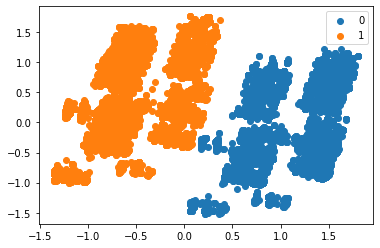

In [42]:
# pca가 완료된 이후의 2개의 cluster 시각화
for i in sorted(pca_df['cluster'].unique()):
    tmp = pca_df.loc[pca_df['cluster'] == i] #해당하는 클러스터 번호일 때 그림을 그리고, for문 실행하며 위에 덧그림 
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_df['cluster'].unique()))

In [43]:
scaled_df

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,cluster
0,0.000000,0.113372,0.350834,1.000000,0.0,0.0,0.0,0.052632,0.116667,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.052632,0.084302,0.537571,0.980335,0.0,1.0,0.0,0.105263,0.566667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.000000,0.069767,0.668826,0.884427,1.0,1.0,0.0,0.052632,0.850000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.105263,0.055233,0.738350,0.990454,0.0,1.0,0.0,0.157895,0.800000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.052632,0.127907,0.514530,0.849106,0.0,0.0,0.0,0.105263,0.950000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0.000000,0.113372,0.733937,0.869089,0.0,0.0,0.0,0.052632,0.500000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
26453,0.000000,0.078488,0.903880,0.869598,0.0,1.0,1.0,0.000000,0.600000,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
26454,0.000000,0.156977,0.587837,0.655063,0.0,0.0,1.0,0.052632,0.566667,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
26455,0.000000,0.244186,0.531381,0.695730,1.0,0.0,0.0,0.052632,0.500000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#### 데이터에 KMeans 군집 분석 결과 column을 추가함으로써 군집 분석 결과 반영

In [44]:
# data에 'cluster' column 추가
data['cluster'] = scaled_df['cluster']
data

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,cluster
0,0,202500.0,-19031,0,0,0,0,2,-53,1.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,157500.0,-15773,-309,0,1,0,3,-26,0.0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,135000.0,-13483,-1816,1,1,0,2,-9,1.0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2,112500.0,-12270,-150,0,1,0,4,-12,1.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,225000.0,-16175,-2371,0,0,0,3,-3,1.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,202500.0,-12347,-2057,0,0,0,2,-30,NaN,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
26453,0,148500.0,-9382,-2049,0,1,1,1,-24,NaN,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
26454,0,270000.0,-14896,-5420,0,0,1,2,-26,NaN,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26455,0,405000.0,-15881,-4781,1,0,0,2,-30,NaN,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [45]:
# 다시 원래대로 train(credit 값 존재)과 test(credit 값 NaN) 분리
train_data = data.loc[data['credit'].notnull()]
test_data = data.loc[data['credit'].isnull()]

## 3. train 데이터셋 분리 및 추가 전처리(class imbalance)
+ random_state = 42로 통일

In [46]:
# 0과 1의 label 값의 비율 확인 -> 1:7 의 class imbalance 상태 -> 전처리
train_data['credit'].value_counts()

1.0    11617
0.0     1611
Name: credit, dtype: int64

In [47]:
# train_dum -> train:test = 7:3으로 y값의 비율 맞춰(stratify) 분리
from sklearn.model_selection import train_test_split

y = train_data['credit']
X = train_data.drop(['credit'],axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [48]:
# class imbalance 해결을 위해 SMOTETomek을 이용한 복합 oversamping 진행
# over_X : oversampling된 train_X
# over_y : oversampling된 train_y
from imblearn.combine import *

over_X, over_y = SMOTETomek(random_state=42).fit_resample(train_X, train_y)

In [49]:
# StandardScaler을 이용해 데이터셋 정규화
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

sd.fit(over_X)
over_X_sd = sd.transform(over_X)
val_X_sd = sd.transform(val_X)

## 4. Modeling

### Deep Neural Network(DNN)

#### MLPClassifier 사용

In [50]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)

In [51]:
# 하이퍼파라미터 탐색
mlp.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [52]:
# 그리드 서치 -> 하이퍼파라미터 튜닝 진행
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(random_state=42)
para1 = {'activation': ['tanh', 'relu']}

mlp = GridSearchCV(estimator = mlp, param_grid = para1, cv=5, scoring='accuracy')
mlp.fit(over_X_sd, over_y)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['tanh', 'relu']}, scoring='accuracy')

In [53]:
# 최적 하이퍼파라미터 확인
mlp.best_params_

{'activation': 'tanh'}

In [54]:
# 검증 데이터 accuracy 확인
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(activation='tanh', random_state=42).fit(over_X_sd, over_y)
pred = mlp.predict(val_X_sd)
accuracy_score(val_y, pred)

0.8445452254976065

#### DNN 직접 구현

In [55]:
# 모델 구현
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(57,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

In [56]:
# Compiling
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = 'acc')

In [57]:
# earlystopping 생성
early_stopping = keras.callbacks.EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)

history = model.fit(over_X_sd, over_y,
                    validation_data=(val_X_sd, val_y),
                    batch_size=32, epochs=100, callbacks=[early_stopping])

Epoch 1/100
472/472 [==============================] - 4s 5ms/step - loss: 0.5705 - acc: 0.6914 - val_loss: 0.5097 - val_acc: 0.7790
Epoch 2/100
472/472 [==============================] - 2s 4ms/step - loss: 0.3573 - acc: 0.8482 - val_loss: 0.4367 - val_acc: 0.8413
Epoch 3/100
472/472 [==============================] - 2s 4ms/step - loss: 0.3194 - acc: 0.8703 - val_loss: 0.4192 - val_acc: 0.8612
Epoch 4/100
472/472 [==============================] - 2s 4ms/step - loss: 0.3091 - acc: 0.8762 - val_loss: 0.4032 - val_acc: 0.8660
Epoch 5/100
472/472 [==============================] - 2s 4ms/step - loss: 0.3041 - acc: 0.8782 - val_loss: 0.3959 - val_acc: 0.8677
Epoch 6/100
472/472 [==============================] - 2s 4ms/step - loss: 0.3011 - acc: 0.8797 - val_loss: 0.3937 - val_acc: 0.8702
Epoch 7/100
472/472 [==============================] - 2s 4ms/step - loss: 0.2992 - acc: 0.8804 - val_loss: 0.3962 - val_acc: 0.8713
Epoch 8/100
472/472 [==============================] - 2s 4ms/step - 

In [58]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Best Validation Loss: 0.3884
Best Validation Accuracy: 0.8758


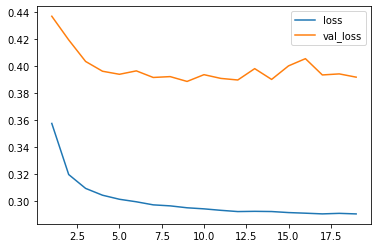

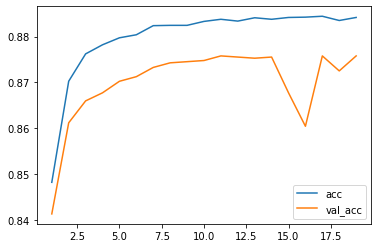

In [59]:
# loss, accuracy 시각화
history_df = pd.DataFrame(history.history)
history_df.loc[1:, ['loss', 'val_loss']].plot()
history_df.loc[1:, ['acc', 'val_acc']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), history_df['val_acc'].max()))

### Decision Tree(DT)

In [60]:
# decision tree 클래스 지정
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

In [61]:
# 하이퍼파라미터 탐색
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [62]:
# 그리드 서치 -> 하이퍼파라미터 튜닝 진행
dt = DecisionTreeClassifier(random_state=42)
para2 = {'criterion':['gini','entropy'], 'max_depth':[5, 10, 15, 20]}

dt = GridSearchCV(estimator = dt, param_grid = para2, cv=5, scoring='accuracy')
dt.fit(over_X_sd, over_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20]},
             scoring='accuracy')

In [63]:
# 최적 하이퍼파라미터 확인
dt.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [64]:
# 검증 데이터 accuracy 확인
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)
dt.fit(over_X_sd, over_y)
pred = dt.predict(val_X_sd)
print(accuracy_score(val_y, pred))

0.8110355253212396


### Logistic Regression(LR)

In [65]:
# logistic regression 클래스 지정
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

In [66]:
# 하이퍼파라미터 탐색
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [67]:
# 그리드 서치 -> 하이퍼파라미터 튜닝 진행
lr = LogisticRegression(random_state=42)
para3 = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

lr = GridSearchCV(estimator = lr, param_grid = para3, cv=5, scoring='accuracy')
lr.fit(over_X_sd, over_y)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [68]:
# 최적 하이퍼파라미터 확인
lr.best_params_

{'C': 1, 'penalty': 'l2'}

In [69]:
# 검증 데이터 accuracy 확인
lr = LogisticRegression(C=1, penalty='l2', random_state=42)
lr.fit(over_X_sd, over_y)
pred = lr.predict(val_X_sd)
print(accuracy_score(val_y, pred))

0.8778029730410682


## 5. 결과 비교

**모델별 최고 성능**
+ DNN(MLPClassifier) : 0.8445452254976065
+ DNN(직접 구현) : 0.8758
+ Decision Tree : 0.8110355253212396
+ Logistic Regression : 0.8778029730410682

**KMeans Clustering 이후의 DNN, Decision Tree, Logistic Regrssion 중에서는 'KMeans + LR'이 약 0.8778으로 성능이 가장 우수**